# Module 1 - Python Foundations & Basic Data Types

For a *Cloud & Big Data Engineering* Python is the "glue language" you'll use to load data, shape it, validate it, and ship it through data pipelines - locally and on AWS.

In this notebook you'll learn the Python essentials you'll need immediately for data work (and for the upcoming Pandas/SQLAlchemy parts of the course).

**What you should be able to do by the end**

- Run Python confidently in Jupyter (cells, outputs, kernel state).
- Use variables and basic expressions.
- Understand and use the core data types: `int`, `float`, `bool`, `str`, `NoneType`.
- Apply operators (arithmetic, comparison, boolean) and basic type conversions.
- Recognize common pitfalls (floating-point precision, implicit string → number issues, truthiness).

## A quick note about the environment

For this topic we assume Python is already available in your Jupyter environment (local JupyterLab, VS Code, SageMaker Studio, or similar). We intentionally skip OS-specific installation steps here.

## Why Python (for data & cloud)

- **Readable and productive**: great for rapid iteration and collaboration.
- **Ecosystem**: Pandas, `NumPy`, `PyArrow`, `SQLAlchemy`, `boto3`, `Spark` integrations, and many more.
- **Automation & pipelines**: scripts, notebooks, CLI tools, and services.

A fun Easter egg: Python includes a short philosophy poem called *The Zen of Python*.

In [ ]:
# !pip freeze

diamonds.csv  my_job.py  sample_data


In [ ]:
import this

## Working effectively in Jupyter

Key ideas:
- A **kernel** holds your variables in memory.
- A notebook is a sequence of **cells** (Markdown or code).
- If things get weird, **Kernel → Restart** gives you a clean state.

Try running the cells below and observe outputs.

In [ ]:
# A code cell runs top-to-bottom. The last expression is displayed.
2 + 3 * 4

In [ ]:
# Variables live in the kernel state.
x = 10
x

### Getting help

In notebooks you can use `help(...)` or view docstrings via `object?` in Jupyter. Example:

In [ ]:
help(len)

In [ ]:
len?

## Notebooks vs scripts (why you should care)

In real data engineering work, code often needs to run **non-interactively**:
- as a scheduled job (cron / Airflow / Step Functions),
- inside a container (Docker),
- as a batch step on AWS (Glue / EMR / ECS),
- or as a serverless function (Lambda).

A notebook is great for learning and exploration. A script is better for repeatable pipeline steps.

In [ ]:
# A computer program is a sequence or set of instructions in a programming language for a computer to execute.

# script will run from line 1 till the end

# a notebook is interactive, all the cells are in the same memory session, and can run independantly (check run #)

Here is a minimal (and common) Python script structure:

```python
# my_job.py

def main():
    print("Run the job here")

if __name__ == "__main__":
    main()
```

**הסבר:** `if __name__ == '__main__'` רץ רק כשמריצים את הקובץ ישירות (`python my_job.py`), לא בעת `import`.

We'll revisit this when we start building small pipeline steps and command-line tools.

In [ ]:
%%writefile my_job.py

def main():
    print("Run the job here")

if __name__ == "__main__":
    main()

Writing my_job.py


In [ ]:
!python my_job.py

Run the job here


### Interactive input / output

In notebooks and scripts, `print()` outputs text, and `input()` reads **text** from the user and returns a `str`.

In [ ]:
name = input("Your name: ")
print(f"Hi {name}!")

Your name: onn
Hi onn!


In [ ]:
name = input("Your name: ")
print(name)
print(name)
name

Your name: onn
onn
onn


'onn'

### Controlling `print()` output

By default, `print()` ends each line with a newline (`\n`). You can change this with the `end` parameter:
- `end=""` to keep printing on the **same line**
- `end=", "` or any other string to use a custom separator between prints

In [1]:
# Default behavior: each print ends with a newline
print("Hello")
print("World")

# Using end="" to print on the same line
print("Hello ", end="")
print("World")

# Using a custom separator
for word in ["Loading", "data", "pipeline"]:
    print(word, end="... ")
print("done!")

Hello
World
Hello World
Loading... data... pipeline... done!


build in functions:

* len()
* print()
* input()
* help()
* id()  | isinstance()

## First steps: expressions and variables

Python evaluates expressions and stores results in variables.

In [ ]:
x = 5 + 10

python is **CASE SENSITIVE** , so
```
x != X
y != Y
hello != Hello
```

### Variable names: rules and conventions

Python variable names are **identifiers**. They follow a few rules:

**Must**
- Start with a **letter** (`a-z`, `A-Z`) or an underscore (`_`)
- Continue with letters, digits (`0-9`), or underscores

**Must not**
- Start with a digit (✅ `age2`, ❌ `2age`)
- Contain spaces or symbols like `-`, `$`, `#`
- Be a Python **keyword** like `for`, `class`, `if` (you can check with `import keyword; keyword.kwlist`)

**Style (PEP 8)**
- Use `snake_case` for variables and functions: `total_bytes`, `purchase_date`
- Use `UPPER_CASE` for constants by convention: `MAX_RETRIES = 3`
- Use `CamelCase` for class names (later in the course)

Valid names:
```python
counter
purchase_date
_internal_sum
PI
```

Invalid names:
```python
$counter
#_of_days
2nd_place
total-bytes
```

In [ ]:
message = "Hello, data!"
print(message)

> **Note**: Always prefer descriptive names! `total_bytes` is better than `tb` (not to mention `i`, `q`, etc.)

### Comments

Use `#` for single-line comments. Comments explain **why** something is done, not what the code literally says.

For longer explanations, you can use **multi-line comments** with triple quotes (`'''` or `"""`). These are technically string literals that Python evaluates but doesn't assign anywhere, so they're commonly used as block comments.

In [ ]:
# Convert GB to bytes (binary GiB, common in computing)
gb = 2
bytes_in_gib = gb * 1024 ** 3
bytes_in_gib

In [ ]:
'''
This is a multi-line comment.
Useful for longer explanations that span several lines,
or for temporarily disabling a block of code during debugging.
'''

x = 42
print(x)

### Indentation

* Indentation refers to the spaces at the beginning of a code line
* later we will discuss on the use of indentation as part of a code block
* for now, know that a misplaced indentation will crush the code

```
x = 5

    x = x+3

print(x)
```


In [ ]:
## Indentation Error Example
x = 5

x = x + 3

print(x)

IndentationError: unexpected indent (ipython-input-1180978256.py, line 4)

<font color="red">SOLVE Question 1-3</font>

✏️ **תרגיל**

## EX 1

declare new variable that will hold your first name, print out your name

In [3]:
first_name = 'Bar'

print(first_name)

Bar


✏️ **תרגיל**

## EX 2
read the `print()` `help` info,

Change the print so it will print each value in seperate line

```
print('hello','world','pizza', sep=' ' , end='\n')
```


In [10]:
print?

In [12]:
print('hello','world','pizza', sep='\n')

hello
world
pizza


✏️ **תרגיל**

## EX 3

ask the user for first name and last name print each in different line

```
input:
what is your first name ? Onn
what is your last name ? Meltzer

output:
>> Onn
>> Meltzer

```

In [16]:
first_name = input("What is your fisrt name: ")
last_name = input("What is your last name: ")

print(f'>> {first_name}')
print(f'>> {last_name}')

What is your fisrt name: Bar
What is your last name: Eckl
output: Bar, Eckl


🎯 **מה נלמד כאן:** סוגי נתונים בסיסיים (types) וערכיהם – איך לבדוק סוג עם `type()` ולהבין int, float, bool, str, None.

## Types and values

![link text](https://media.geeksforgeeks.org/wp-content/uploads/20191023173512/Python-data-structure.jpg)

Python is **dynamically typed** (you don't declare types), but **strongly typed** (it won't silently mix incompatible types).

Use `type()` to inspect a value's type.

In [ ]:
print(type(42))    # int – מספר שלם
print(type(3.14))  # float – מספר עשרוני
print(type(True))  # bool – ערך בוליאני
print(type("cloud"))  # str – מחרוזת
print(type(None))  # NoneType – העדר ערך

<class 'int'>
<class 'float'>
<class 'bool'>
<class 'str'>
<class 'NoneType'>


> **Note**: Python does have a rich typing system, but it's non-coercive by design - you don't have to use it. A separate *static type checker* (like `mypy`) is required to take advantage of these type annotations.
> ```python
> number: int | float = 0.0
> user_ids: list[str] = ["udi182", "ron1ron#", "hhw88ab"]
> ```

## Variable reassignment

python has the ability to re-assign a variable to a new one.

the old reference is lost and python will automatically remove it from memory.

```
x = 'hello'

x = 5

print(x)

```


## Numbers: `int` and `float`

- `int` for whole numbers.
- `float` for decimal (floating-point) numbers.

Common operators:
- `+`, `-`, `*`, `/` (true division)
- `//` (floor division)
- `%` (modulo)
- `**` (power)

In [ ]:
a = 7
b = 3

print(a / b)   # true division (float)
print(a // b)  # floor division (integer for ints)
print(a % b)   # remainder (modulo)

2.3333333333333335
2
1


### Floating-point precision

`float` values are stored in binary, so some decimals can't be represented exactly. This is normal in most languages.

In [ ]:
0.1 + 0.2

0.30000000000000004

When you need to **compare floats** for equality, use `math.isclose()` instead of `==`:

```python
import math
math.isclose(0.1 + 0.2, 0.3)  # True
```

This accounts for tiny rounding differences that are inherent to floating-point arithmetic.

In [ ]:
import math

print(0.1 + 0.2 == 0.3)             # False (surprising!)
print(math.isclose(0.1 + 0.2, 0.3)) # True  (correct way)

## Booleans: `bool`

Booleans are `True` and `False`.

Comparison operators produce booleans: `==`, `!=`, `<`, `<=`, `>`, `>=`.

In [ ]:
x = 10

print(x > 5)
print(x == 10)
print(x != 10)

True
True
False


### Boolean logic

- `and` / `or` combine conditions
- `not` negates a condition

Pay attention to parentheses to make intent clear.

In [ ]:
is_weekday = True
has_data = False

print(is_weekday and has_data)
print(is_weekday or has_data)
print(not has_data)

False
True
True


In [ ]:
x = 10
diviator = 0

if x > 5 or x / diviator:
  print('wow')

wow


🎯 **מה נלמד כאן:** אילו ערכים נחשבים True ואילו False בתנאים – והמלכודת של `bool("False")`.

### Truthiness (a.k.a Pythonic Truth)

| ערך | bool() |
|-----|--------|
| `0` / `0.0` / `''` / `None` / `[]` / `{}` | **False** |
| כל שאר הערכים | **True** |

In Python, any value can be casted to boolean. The general rule is that "empty" values (empty lists, zero length strings, etc.) are `False` when casted to boolean, while other values are `True`. When used in `if` or `while` conditions (we'll get there...), the casting is done automatically (i.e., no need for explicit casting like `bool(value)`.

Common falsy values:
- `None` (missing / not available)
- `0`, `0.0`
- `''` (empty string)
- **Empty containers** like `[]` and `{}`  
  (Quick preview: a **list** is an ordered collection of items; a **dict** maps *keys → values*. We’ll cover them properly in the next topic.)

Use `bool(value)` to see how Python interprets a value in a condition.

In [ ]:
data = 0

# None , df(no records) , df(w records)

if data: # -> if bool(data)
  print('we have data!')
else:
  print('no data here!')

no data here!


In [ ]:
print(f"bool(None) -> {bool(None)}")
print(f"bool(0) -> {bool(0)}")
print(f"bool(0.0) -> {bool(0.0)}")
print(f"bool('') -> {bool('')}")
print(f"bool('0') -> {bool('0')}  # non-empty string is truthy")

# Preview of containers (details in the next topic):
empty_list = []
non_empty_list = [1]
empty_dict = {}
non_empty_dict = {"a": 1}

print(f"bool([]) -> {bool(empty_list)}        # empty list")
print(f"bool([1]) -> {bool(non_empty_list)}   # non-empty list")
print(f"bool({{}}) -> {bool(empty_dict)}       # empty dict")
print(f"bool({{'a': 1}}) -> {bool(non_empty_dict)}  # non-empty dict")

## `None` (missing / not available)

`None` represents the absence of a value. In data work you'll use it to represent missing fields or "not yet computed" values.

Check for it using `is` / `is not` (not `==`).

In [ ]:
value = None

print(value is None)   # preferred
print(value == None)   # works, but avoid (can be overridden in custom classes)

## Strings basics: `str` (preview)

Strings are sequences of characters.

In this module we only need the basics; we'll go deep on strings later.

Key ideas:
- Quotes: `'single'` or `"double"`
- Concatenation with `+`
- f-strings for readable formatting

**Example:** Empty string, string with quotes inside (e.g. `"Co."`), and a multi-line string with `"""` (handy for SQL, JSON, etc.).

In [ ]:
s = ''
s = ""

s = 'Co.'   # quotes inside string

s = """
select * from my table
where name = 'onn'
order by ..
"""

print(s)


select * from my table
where 1 = 2
order by ..



**Example:** String concatenation and f-strings.

In [ ]:
name = "Ada"
greeting = "Hello, " + name + "!"
greeting

'Hello, Ada!'

String formatting (e.g. precision for numbers).

In [ ]:
#string formatting

**Example:** Building a SQL query from variables (env, schema, table) using an f-string.

In [ ]:
pi = 3.14159
f"pi ≈ {pi:.2f}"

'pi ≈ 3.14'

In [ ]:
env = 'PRD'
schema = 'dbo'
target_table = 'employees'
target_employee_first_name = 'Alice'

s = f"""
select * from {env}.{schema}.{target_table}
where name = '{target_employee_first_name}'
order by ..
"""
print(s)


select * from my table
where name = '123456789'
order by ..



### Length and indexing

Many Python objects are **sequences**: an **ordered** collection of items.
- A string is a sequence of characters (`"data"` → `'d'`, `'a'`, `'t'`, `'a'`)
- (Later) lists and tuples are sequences of arbitrary objects

Because sequences are ordered, you can access an item by its **index**.

**Key ideas**
- Indexing is **0-based**: the first item is at index `0`
- Negative indexes count from the end: `-1` is the last item  
  This is handy when you want “the last element” without knowing the length in advance.

**Common pitfalls**
- Going out of range raises `IndexError`
- Indexing returns **one item**; slicing (like `s[1:4]`) returns a **subsequence** (we’ll cover slicing later)

In [ ]:
s = 'hello'
print(id(s))

l = len(s) - 1
s[l]

s[-1]

s[1:4]

# immutable object, sequence , ordered
s = 'Z' + s[1:]
print(id(s))

140694438409344
140693432472976


In [ ]:
L = [1,2,3]
print(id(L))

L[0] = 999
print(L)
print(id(L))

140693926353472
[999, 2, 3]
140693926353472


In [ ]:
s?

In [ ]:
s = "pipeline"

print(len(s))   # length
print(s[0])     # first character
print(s[-1])    # last character (negative indexing)

## Type conversions (casting)

Real data often arrives as strings (files, APIs, CLI arguments). You'll frequently convert types.

Common constructors:
- `int(...)`
- `float(...)`
- `str(...)`
- `bool(...)`

In [ ]:
print(int("123"))
print(float("3.5"))
print(str(99))

In [ ]:
s = str() # constr
s = str(10) # cast

s , type(s)

('10', str)

⚠️ **מלכודת נפוצה**

### Common pitfall: numeric strings

`"10" + "5"` is string concatenation, not addition.

Try the cell below:

In [ ]:
"10" + "5"

'105'

Convert first if you want numeric addition:


In [ ]:
int("10") + int("5")

15

In [ ]:
my_id = 100

sql = """
select * from table
where id = """ + str(my_id) + """
and city = 'TLV'
"""
city = 'TLV'

sql = f"""
select * from table
where id = {my_id}
and city = '{city}'
"""



sql = f'''
select * from table
where id = {my_id}
and city = "{city}"
'''

print(sql)


select * from table
where id = 100
and city = "TLV"



⚠️ **מלכודת נפוצה**

### Another pitfall: `bool("False")`

Any **non-empty** string is truthy, even the string "False".

In [ ]:
0, 0.0, [] , '' , None, {}

In [ ]:
print(bool("False"))  # True! – כל מחרוזת לא-ריקה היא True
print(bool(""))       # False – רק מחרוזת ריקה היא False

True
False


## Mini data-style example

Imagine you received a small batch of numeric values as strings (e.g., from a log line). Convert and compute a simple aggregate.

In [ ]:
# A very small "dataset" as strings (pretend these came from a CSV column)
raw = ["10", "12", "9", "11"]  # list = ordered collection of items (details next topic)

print('ללא המרה:', raw[0] + raw[1])  # '1012' – שרשור, לא חיבור!

numbers = [int(raw[0]), int(raw[1]), int(raw[2]), int(raw[3])]
total = sum(numbers)
avg = total / len(numbers)

print(total)   # סכום המספרים
print(avg)     # ממוצע

42
10.5


## Exercises

✏️ **תרגיל**

### Exercise 1 - Types and conversions

1. Create variables `a = "100"` and `b = 25`.
2. Convert `a` to an integer and add it to `b`.
3. Print the result and its type.

In [17]:
# Your code here
a = "100"

b= 25

result = int(a) + b

print(result)

125


#### Solution

In [ ]:
a = "100"
b = 25
result = int(a) + b
print(result, type(result))

✏️ **תרגיל**

### Exercise 2 - Operators

1. Compute the number of full minutes and remaining seconds in `total_seconds = 367`.
2. Store them in `minutes` and `seconds`.

In [20]:
# Your code here
total_seconds = 367

minutes = total_seconds // 60

seconds = total_seconds % 60

print(minutes, seconds)

6 7


#### Solution

In [ ]:
total_seconds = 367
minutes = total_seconds // 60
seconds = total_seconds % 60

print(minutes, seconds)

✏️ **תרגיל**

### Exercise 3 - Truthiness

For each value below, predict `bool(value)` **before** running the code:
- `0`
- `""`
- `"0"`
- `None`
- `[]`
- `[0]`

In [29]:
# Your code here
values = [0, "", "0", None, [], [0]]

for v in values:
  print(v, bool(v))

0 False
 False
0 True
None False
[] False
[0] True


#### Solution

In [27]:
values = [0, "", "0", None, [], [0]]
[(v, bool(v)) for v in values]

[(0, False), ('', False), ('0', True), (None, False), ([], False), ([0], True)]

## Preview: two self-explanatory examples

These are here to **whet your appetite**. Don't worry if not every line makes sense yet - we'll build up to all of it.

### Example 1 - Interactive "Guess My Number" game

In [ ]:
import random

# The computer "chooses" a number
secret = random.randint(1, 100)

print("I have chosen a number between 1 and 100.")
print("Try to guess it...")

guess = int(input("Your guess: "))

# Game loop. Keep on going until guess matches secret
while guess != secret:
    # User feedback
    if guess > secret:
        print("Too high, try again...")
    else:
        print("Too low, try again...")
    guess = int(input("Your guess: "))

print("Nice! GAME OVER")

I have chosen a number between 1 and 100.
Try to guess it...
Your guess: 10
Too low, try again...
Your guess: 20
Too low, try again...
Your guess: 30
Too low, try again...
Your guess: 40
Too low, try again...
Your guess: 90
Too low, try again...
Your guess: 100
Too high, try again...
Your guess: 95
Nice! GAME OVER


> What would be the best approach to winning this game in as few guesses as possibel? 🤔

### Example 2 - Quick data exploration (Pandas)

For this example to work you'll need to upload the `diamonds.csv` file.

In [ ]:
import pandas as pd
import seaborn as sns

df = pd.read_csv("/content/diamonds.csv")

df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


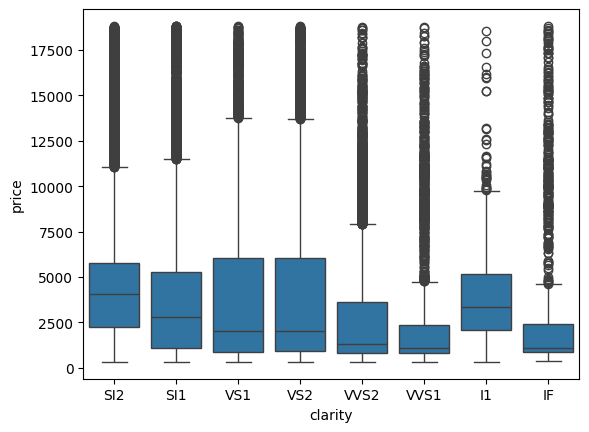

In [ ]:
import pandas as pd
import seaborn as sns

df = pd.read_csv("/content/diamonds.csv")

display(df.head())

# Filter rows (carat > 2.5 and price < 10000)
df[(df.carat > 2.5) & (df.price < 10000)]

# Average price per cut
df.groupby("cut")["price"].mean().sort_values()

# Simple visualization
sns.boxplot(x="clarity", y="price", data=df);

## Takeaways

- You can inspect types with `type()`.
- Core types you'll use constantly in pipelines: `int`, `float`, `bool`, `str`, `None`.
- Be explicit with conversions when data arrives as strings.
- Expect floating-point precision quirks.

## What's next

Next topics build on this foundation: strings in depth, containers, and flow control - then we'll move into file formats, SQLAlchemy, and Pandas for real data work.

<hr/>